In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
import os
from torchvision.transforms import v2
import torch


# Local dep
project_dir = '/data/konrad/workspace'
sys.path.insert(0, project_dir)

from helpers.datasets import CalfCenterFaceDataset
from helpers.helpers import load_face_data

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/data/konrad/workspace/datasets/CompleteDatasetNormalFace/Face_annotations.csv')

# Display the DataFrame
df.head()

,image,xmin,ymin,xmax,ymax,label
0,0-0006905337495862751__6809_ch1_from_280220221...,1224.621468,684.720000,1543.636799,1205.307026,Diarrhea
1,0-2794890219882735__6809_ch1_from_280220221301...,1245.981844,767.943952,1563.254083,1273.895252,Diarrhea
2,0-6056486532338973__6809_ch1_from_280220221410...,1253.091610,703.032775,1526.816613,1186.754230,Diarrhea
3,0-6352214729396954__6809_ch1_from_270220221407...,1126.004987,803.511705,1466.383799,1229.435560,Diarrhea
4,0-7735942344515452__6809_ch1_from_270220221732...,1206.878330,769.152659,1495.711503,1275.673612,Diarrhea


In [39]:
df.shape

(187, 6)

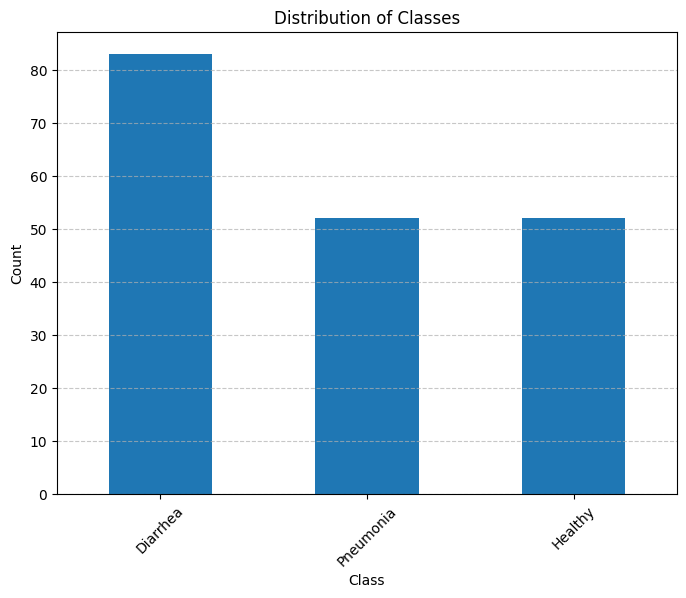

In [7]:
# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Initialize an empty dictionary to store class IDs
class_claf = {}
calfs_id = []

# Define the regex pattern to extract the ID
id_pattern = r'_(\d{4})_'

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract the image name
    image_name = row['image']
    
    # Use regex to extract the ID from the image name
    match = re.search(id_pattern, image_name)
    # print(match, image_name)
    if match:
        image_id = match.group(1)
    else:
        image_id = None
        continue

    if image_id not in calfs_id:
        calfs_id.append(image_id)
        
    # Extract the class label
    class_label = row['label']
    
    # Check if the class label is already in the dictionary
    if class_label in class_claf:
        # Append the ID to the existing list
        if image_id not in class_claf[class_label]:
            class_claf[class_label].append(image_id)
    else:
        # Create a new list with the ID
        class_claf[class_label] = [image_id]

class_claf_counts = {k: len(v) for k,v in class_claf.items()}

# Print the class IDs
for class_label, ids in class_claf.items():
    print(f"Class: {class_label}, IDs: {', '.join(ids)}")
    
print(f"Ids: {calfs_id}")

Class: Diarrhea, IDs: 6809, 6405, 6787, 6410, 6829, 6778, 6403, 6832, 6441, 6839, 6850, 6859, 6746, 6791, 6422, 6827, 6436
Class: Pneumonia, IDs: 6768, 6794, 6774, 6810, 6371, 6385, 6831, 6780, 6771, 6382, 6786, 6370, 6393, 6842
Class: Healthy, IDs: 6773, 6391, 6783, 6412, 6797, 6864, 6432, 6388
Ids: ['6809', '6768', '6773', '6405', '6391', '6783', '6412', '6787', '6410', '6829', '6778', '6403', '6794', '6774', '6832', '6797', '6441', '6810', '6371', '6839', '6850', '6859', '6385', '6746', '6831', '6780', '6791', '6771', '6864', '6382', '6422', '6786', '6370', '6393', '6432', '6827', '6842', '6388', '6436']


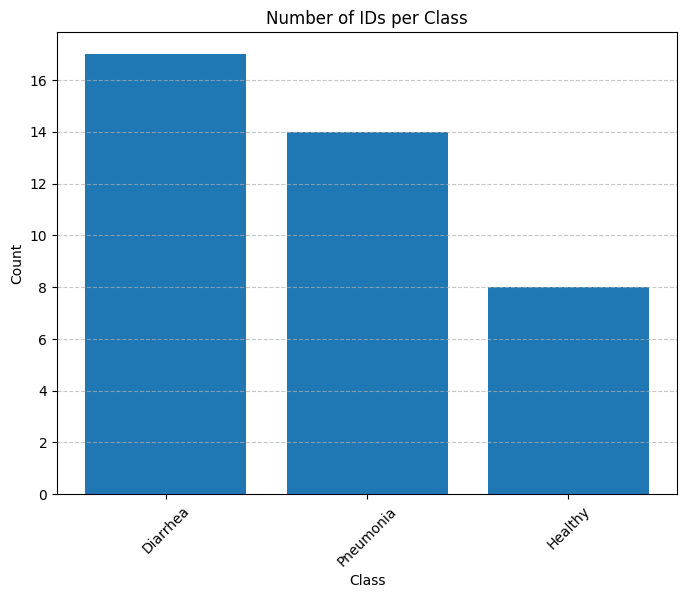

In [38]:
class_calf_counts = pd.DataFrame(list(class_claf_counts.items()), columns=['Class', 'Count'])

# Plot the number of IDs per class
plt.figure(figsize=(8, 6))
plt.bar(class_calf_counts['Class'], class_calf_counts['Count'])
plt.title('Number of IDs per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
row = df.iloc[16]

# Extract the image path and bounding box coordinates
image_path = IMAGE_DIR + '/' + row['path']
xmin = row['xmin']
ymin = row['ymin']
xmax = row['xmax']
ymax = row['ymax']

# Calculate the width and height of the bounding box
bbox_width = xmax - xmin
bbox_height = ymax - ymin

# Print the size of the bounding box
print(f"Bounding box size: Width = {bbox_width}, Height = {bbox_height}")

# Calculate the center of the first bounding box
center_x = xmin + bbox_width / 2
center_y = ymin + bbox_height / 2

# Define the width and height of the second bounding box
second_bbox_width = 800
second_bbox_height = 800

# Calculate the top-left corner of the second bounding box
second_xmin = center_x - second_bbox_width / 2
second_ymin = center_y - second_bbox_height / 2

# Open the image
image = Image.open(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')

# Draw the first bounding box
plt.gca().add_patch(plt.Rectangle((xmin, ymin), bbox_width, bbox_height, edgecolor='red', facecolor='none', linewidth=2))

# Draw the second bounding box
plt.gca().add_patch(plt.Rectangle((second_xmin, second_ymin), second_bbox_width, second_bbox_height, edgecolor='blue', facecolor='none', linewidth=2))

# Show the plot
plt.show()

# # Crop the second bounding box from the image
# cropped_image = image.crop((second_xmin, second_ymin, second_xmin + second_bbox_width, second_ymin + second_bbox_height))

# # Plot the cropped image
# plt.figure(figsize=(8, 8))
# plt.imshow(cropped_image)
# plt.axis('off')
# plt.show()

# Crop the first bounding box from the image
first_cropped_image = image.crop((xmin, ymin, xmax, ymax))

# Resize the first cropped image to 800x800
first_resized_image = first_cropped_image.resize((800, 800))

# Crop the second bounding box from the image
second_cropped_image = image.crop((second_xmin, second_ymin, second_xmin + second_bbox_width, second_ymin + second_bbox_height))

# Plot the first cropped and resized image
plt.figure(figsize=(8, 8))
plt.imshow(first_resized_image)
plt.axis('off')
plt.title("First BBox Cropped and Resized to 800x800")
plt.show()

# Plot the second cropped image
plt.figure(figsize=(8, 8))
plt.imshow(second_cropped_image)
plt.axis('off')
plt.title("Second BBox Cropped")
plt.show()

In [3]:
# bbox_width = xmax - xmin
# bbox_height = ymax - ymin

df["bbox_width"] = df["xmax"] - df["xmin"]
df["bbox_height"] = df["ymax"] - df["ymin"]
df.head()

,image,xmin,ymin,xmax,ymax,label,bbox_width,bbox_height
0,0-0006905337495862751__6809_ch1_from_280220221...,1224.621468,684.720000,1543.636799,1205.307026,Diarrhea,319.015332,520.587026
1,0-2794890219882735__6809_ch1_from_280220221301...,1245.981844,767.943952,1563.254083,1273.895252,Diarrhea,317.272240,505.951300
2,0-6056486532338973__6809_ch1_from_280220221410...,1253.091610,703.032775,1526.816613,1186.754230,Diarrhea,273.725003,483.721454
3,0-6352214729396954__6809_ch1_from_270220221407...,1126.004987,803.511705,1466.383799,1229.435560,Diarrhea,340.378812,425.923856
4,0-7735942344515452__6809_ch1_from_270220221732...,1206.878330,769.152659,1495.711503,1275.673612,Diarrhea,288.833173,506.520953


In [5]:
df[['bbox_width', 'bbox_height']].describe()


,bbox_width,bbox_height
count,187.000000,187.000000
mean,387.720775,503.427659
std,111.978197,161.680990
min,118.199449,203.625400
25%,319.385190,389.911445
50%,385.703456,505.951300
75%,454.578991,628.660041
max,789.180991,864.890776


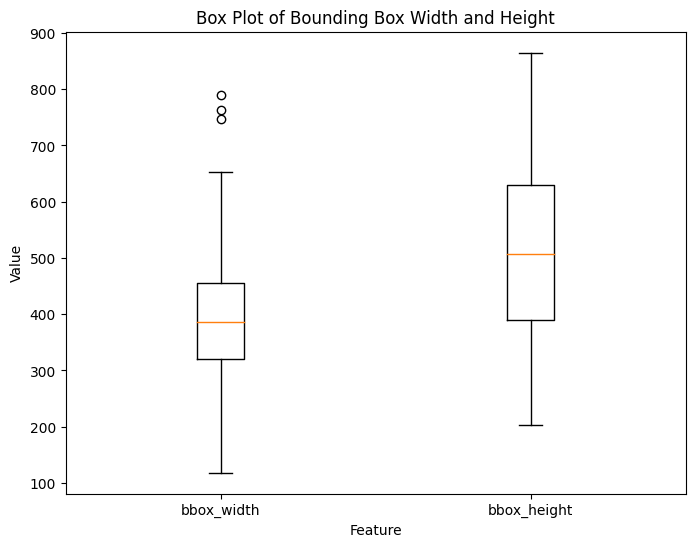

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot([df['bbox_width'], df['bbox_height']])
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks([1, 2], ['bbox_width', 'bbox_height'])
plt.title('Box Plot of Bounding Box Width and Height')
plt.show()

In [2]:
ROOT_DIR = "/data/konrad"
DATA_FILE = '/data/konrad/datasets/CompleteDatasetNormalFace/Face_annotations.csv'
IMAGE_DIR = "/data/konrad/datasets/CompleteDatasetNormalFace"

df, labels, label2id, id2label = load_face_data(DATA_FILE, IMAGE_DIR)

In [3]:
IMAGE_SIZE = 800
IMAGE_DIR = "/data/konrad/datasets/CompleteDatasetNormalFace"

train_transform = v2.Compose([
    v2.Resize(size=(IMAGE_SIZE, IMAGE_SIZE))
])

train_dataset = CalfCenterFaceDataset(df.reset_index(drop=True), IMAGE_DIR)

In [33]:
means = torch.zeros((3, IMAGE_SIZE, IMAGE_SIZE))

for rowid in range(len(train_dataset)): 
    row = train_dataset[rowid]
    row["row_image"] = train_transform(row["row_image"])
    means[0, :, :] += row["row_image"][0, :, :]
    means[1, :, :] += row["row_image"][1, :, :]
    means[2, :, :] += row["row_image"][2, :, :]

means /= len(train_dataset)
print(means.shape)

torch.Size([3, 400, 400])


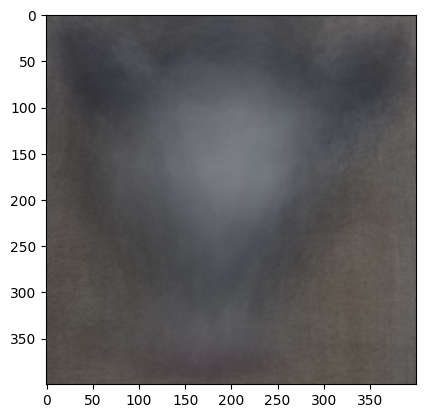

In [34]:
# convert the tensor to a NumPy array
image_array = means.numpy()

# transpose the array to move the channels to the last dimension
image_array = image_array.transpose(1, 2, 0)

# plot the image
plt.imshow(image_array)
plt.show()

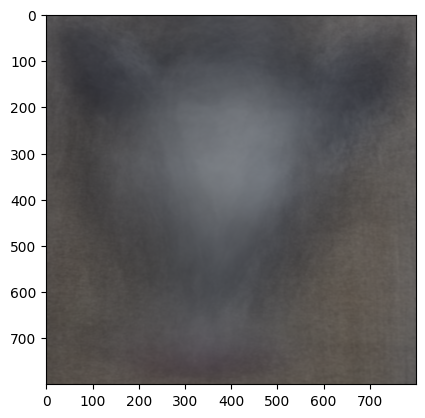

In [38]:
means = sum(train_transform(train_dataset[rowid]["row_image"]) for rowid in range(len(train_dataset))) / len(train_dataset)
# convert the tensor to a NumPy array
image_array = means.numpy()

# transpose the array to move the channels to the last dimension
image_array = image_array.transpose(1, 2, 0)

# plot the image
plt.imshow(image_array)
plt.show()

In [45]:
df[df["target"] == 4].shape[0]

0

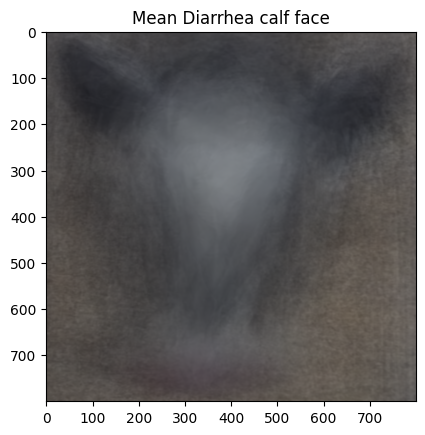

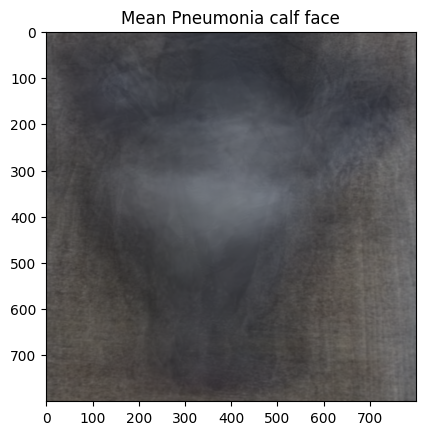

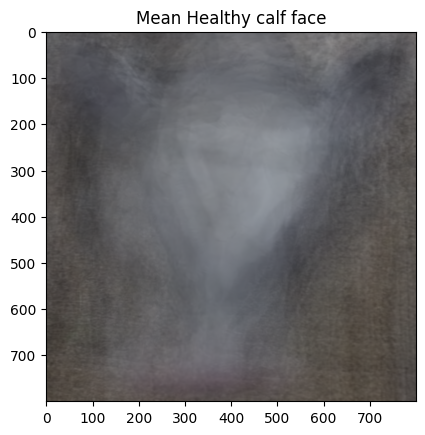

In [47]:
IMAGE_SIZE = 800
IMAGE_DIR = "/data/konrad/datasets/CompleteDatasetNormalFace"

train_transform = v2.Compose([
    v2.Resize(size=(IMAGE_SIZE, IMAGE_SIZE))
])

train_dataset = CalfCenterFaceDataset(df.reset_index(drop=True), IMAGE_DIR)

means = torch.zeros((len(labels), 3, IMAGE_SIZE, IMAGE_SIZE))

for rowid in range(len(train_dataset)): 
    row = train_dataset[rowid]
    row["row_image"] = train_transform(row["row_image"])
    label = row["label"].cpu().item()
    means[label][0, :, :] += row["row_image"][0, :, :]
    means[label][1, :, :] += row["row_image"][1, :, :]
    means[label][2, :, :] += row["row_image"][2, :, :]
    
# means /= len(train_dataset)

for rowid in range(len(labels)):
    means[rowid, :] /= df[df["target"] == rowid].shape[0]
    mn_img = means[rowid, :]
    image_array = mn_img.numpy()

    # transpose the array to move the channels to the last dimension
    image_array = image_array.transpose(1, 2, 0)
    
    # plot the image
    plt.imshow(image_array)
    plt.title(f'Mean {labels[rowid]} calf face')
    plt.show()

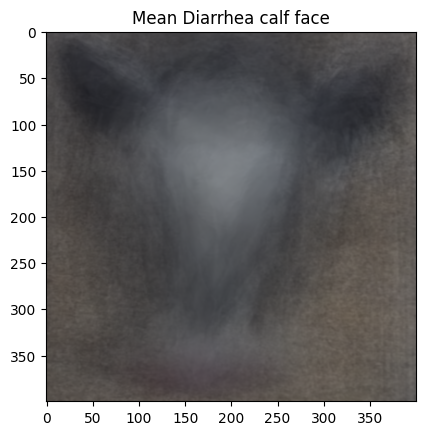

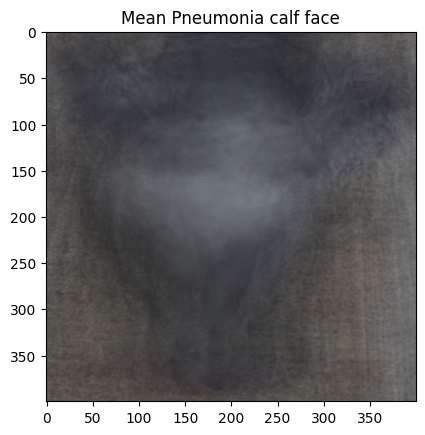

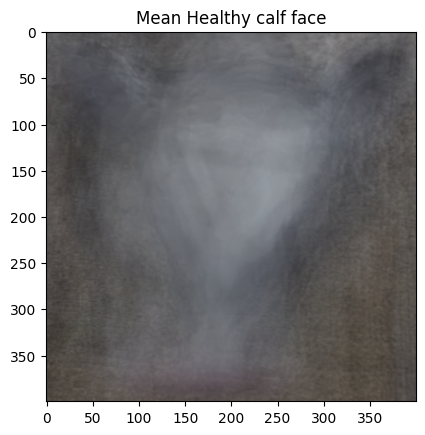

In [48]:
IMAGE_SIZE = 400
IMAGE_DIR = "/data/konrad/datasets/CompleteDatasetNormalFace"

train_transform = v2.Compose([
    v2.Resize(size=(IMAGE_SIZE, IMAGE_SIZE))
])

train_dataset = CalfCenterFaceDataset(df.reset_index(drop=True), IMAGE_DIR)

means = torch.zeros((len(labels), 3, IMAGE_SIZE, IMAGE_SIZE))

for rowid in range(len(train_dataset)): 
    row = train_dataset[rowid]
    row["row_image"] = train_transform(row["row_image"])
    label = row["label"].cpu().item()
    means[label][0, :, :] += row["row_image"][0, :, :]
    means[label][1, :, :] += row["row_image"][1, :, :]
    means[label][2, :, :] += row["row_image"][2, :, :]
    
# means /= len(train_dataset)

for rowid in range(len(labels)):
    means[rowid, :] /= df[df["target"] == rowid].shape[0]
    mn_img = means[rowid, :]
    image_array = mn_img.numpy()

    # transpose the array to move the channels to the last dimension
    image_array = image_array.transpose(1, 2, 0)
    
    # plot the image
    plt.imshow(image_array)
    plt.title(f'Mean {labels[rowid]} calf face')
    plt.show()

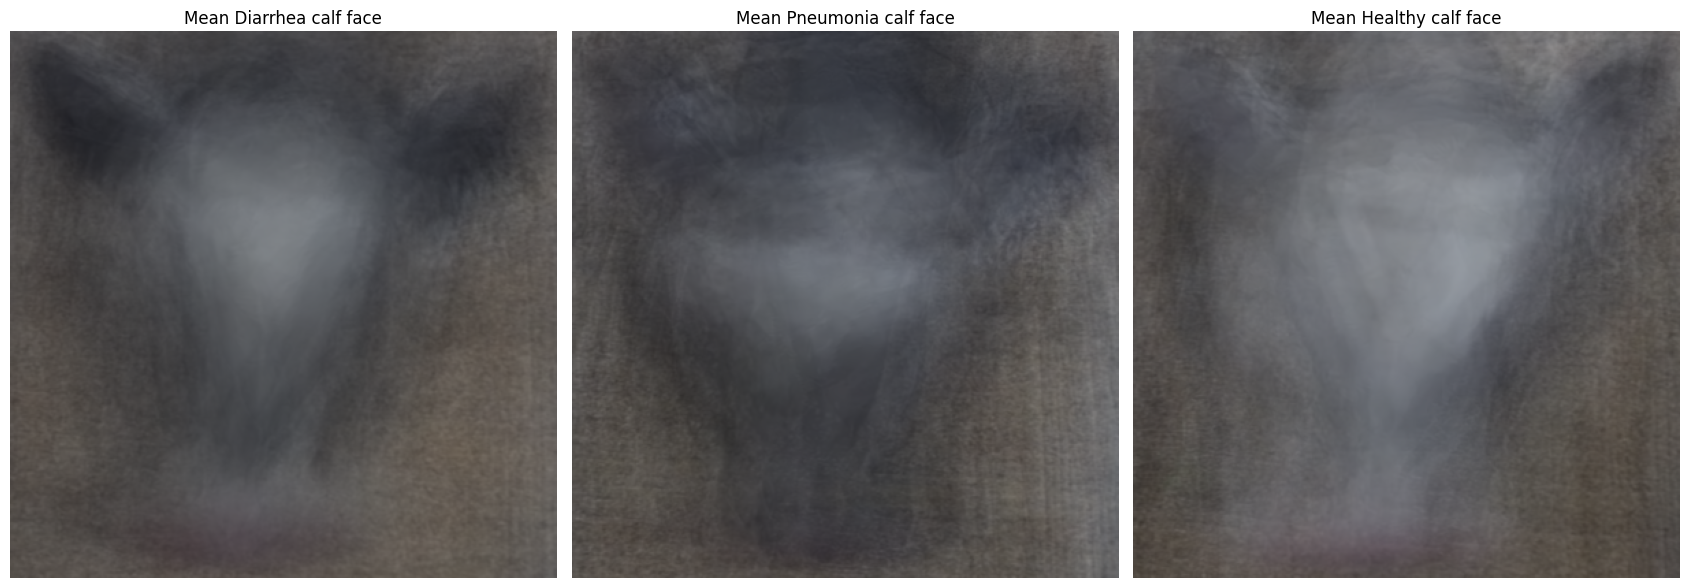

In [4]:
IMAGE_SIZE = 400
IMAGE_DIR = "/data/konrad/datasets/CompleteDatasetNormalFace"

train_transform = v2.Compose([
    v2.Resize(size=(IMAGE_SIZE, IMAGE_SIZE))
])

train_dataset = CalfCenterFaceDataset(df.reset_index(drop=True), IMAGE_DIR)

means = torch.zeros((len(labels), 3, IMAGE_SIZE, IMAGE_SIZE))

for rowid in range(len(train_dataset)): 
    row = train_dataset[rowid]
    row["row_image"] = train_transform(row["row_image"])
    label = row["label"].cpu().item()
    means[label][0, :, :] += row["row_image"][0, :, :]
    means[label][1, :, :] += row["row_image"][1, :, :]
    means[label][2, :, :] += row["row_image"][2, :, :]
    
# means /= len(train_dataset)

fig, axs = plt.subplots(1, len(labels), figsize=(17, 8))

for rowid in range(len(labels)):
    means[rowid, :] /= df[df["target"] == rowid].shape[0]
    mn_img = means[rowid, :]
    image_array = mn_img.numpy()
    image_array = image_array.transpose(1, 2, 0)
    
    axs[rowid].imshow(image_array)
    axs[rowid].set_title(f'Mean {labels[rowid]} calf face')
    axs[rowid].axis('off')  # hide the axis ticks and labels

plt.tight_layout()
plt.show()

In [5]:
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

In [ ]:
gray_images = []
for rowid in range(len(labels)):
    print(means[rowid, :].numpy().shape)
    gray_images = cv2.cvtColor( means[rowid, :].numpy(), cv2.COLOR_BGR2GRAY)

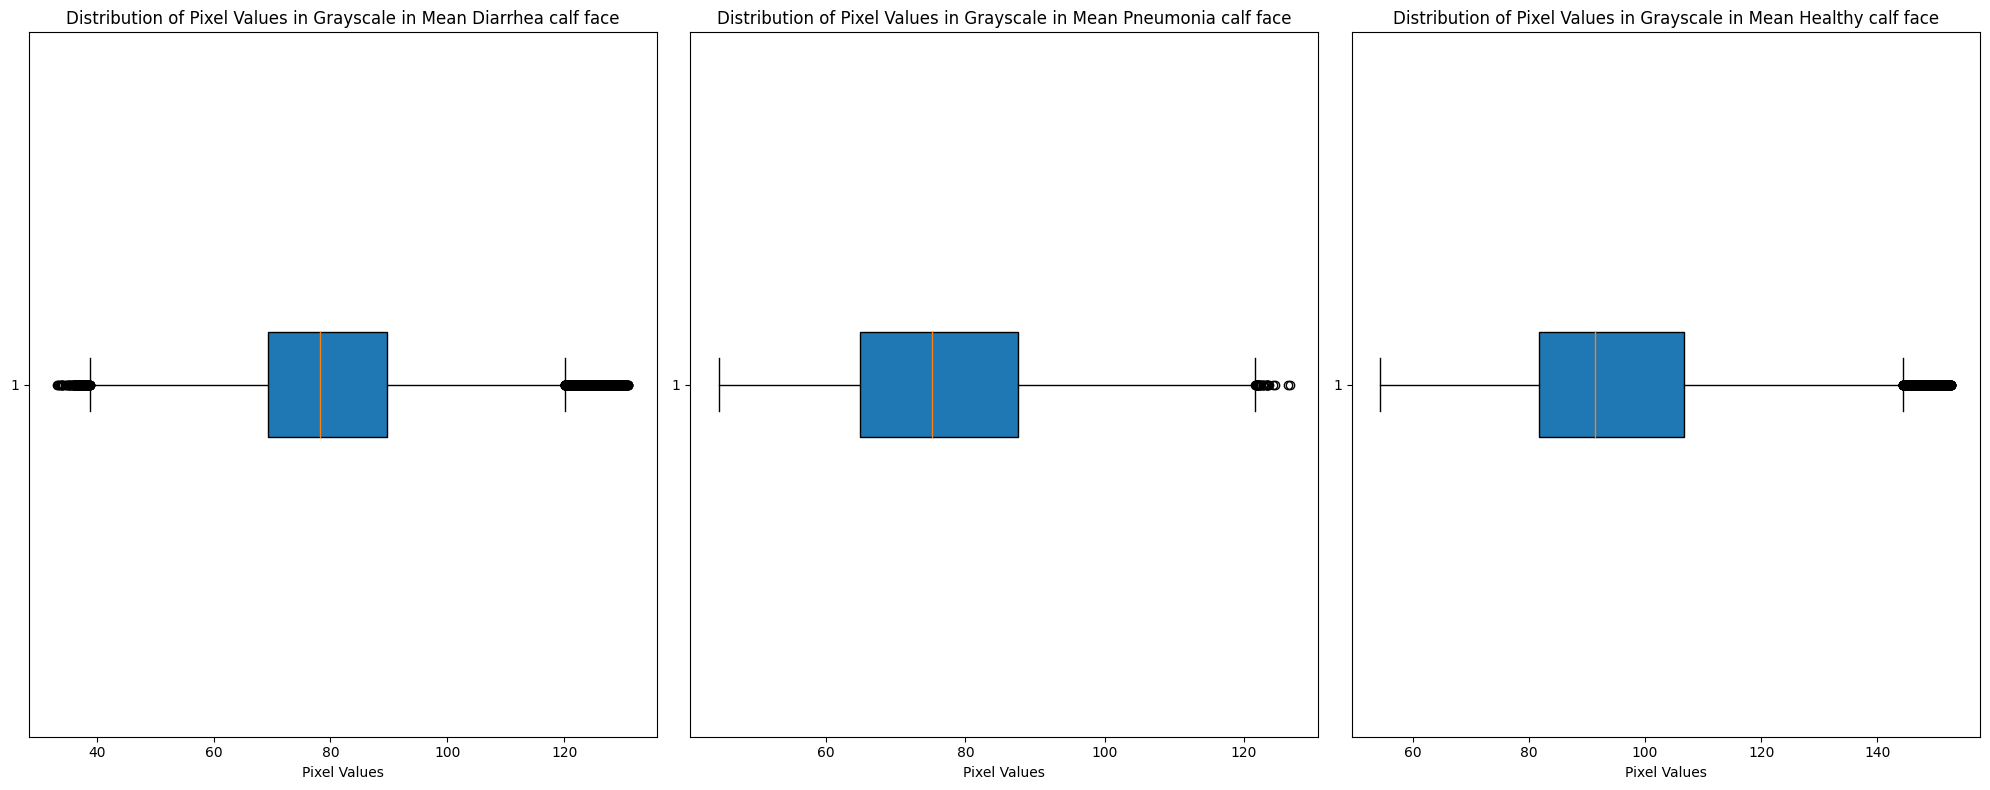

In [6]:
fig, axs = plt.subplots(1, len(labels), figsize=(20, 8))
transform = transforms.Grayscale()

for rowid in range(len(labels)):
    gray_tensor = transform(means[rowid, :])
    pixel_values = gray_tensor.flatten().numpy()

    axs[rowid].boxplot(pixel_values * 255, vert=False, patch_artist=True)
    axs[rowid].set_title(f'Distribution of Pixel Values in Grayscale in Mean {labels[rowid]} calf face')
    axs[rowid].set_xlabel('Pixel Values')  # hide the axis ticks and labels

plt.tight_layout()
plt.show()

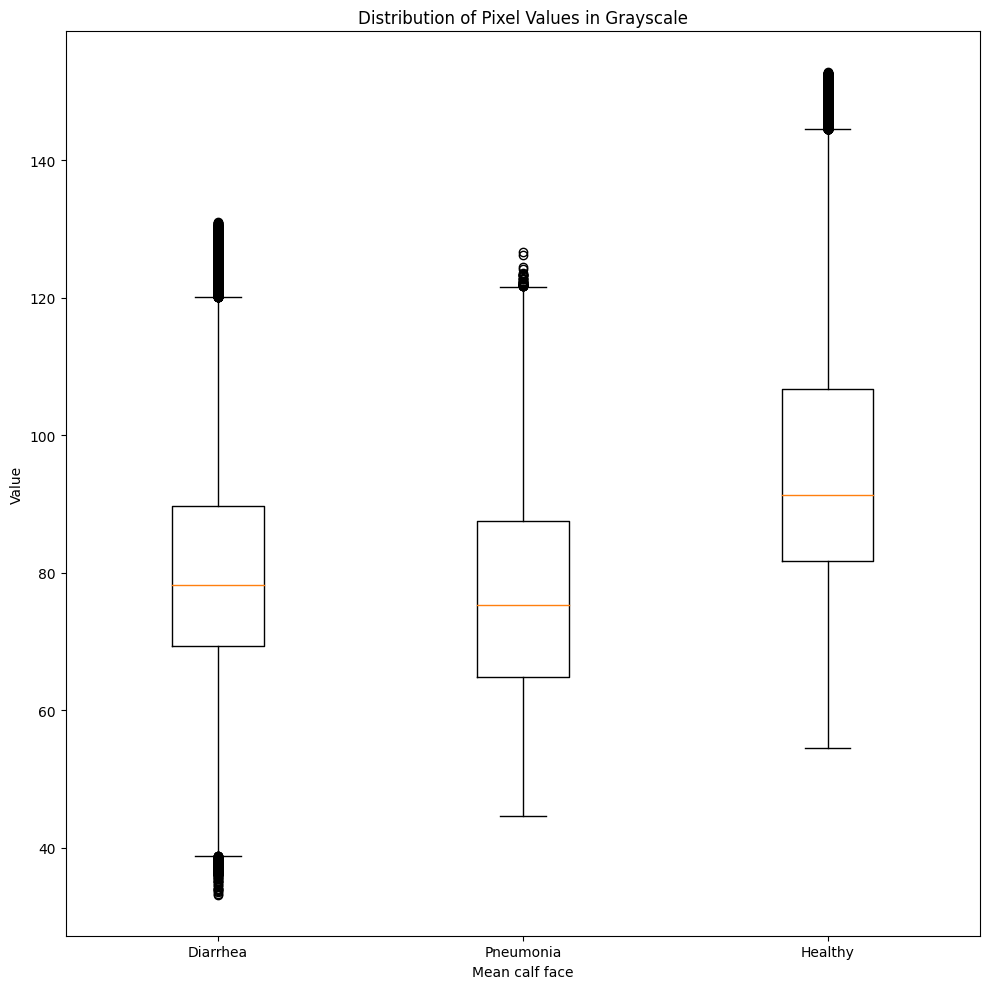

In [9]:
# fig, axs = plt.subplots(1, len(labels), figsize=(20, 8))
transform = transforms.Grayscale()
axs = []
plt.figure(figsize=(10, 10))

for rowid in range(len(labels)):
    gray_tensor = transform(means[rowid, :])
    pixel_values = gray_tensor.flatten().numpy()
    axs.append(pixel_values * 255)

plt.boxplot(axs)
plt.xlabel('Mean calf face')
plt.ylabel('Value')
plt.xticks([1, 2, 3], ['Diarrhea', 'Pneumonia', 'Healthy'])
plt.title('Distribution of Pixel Values in Grayscale')
plt.tight_layout()
plt.show()

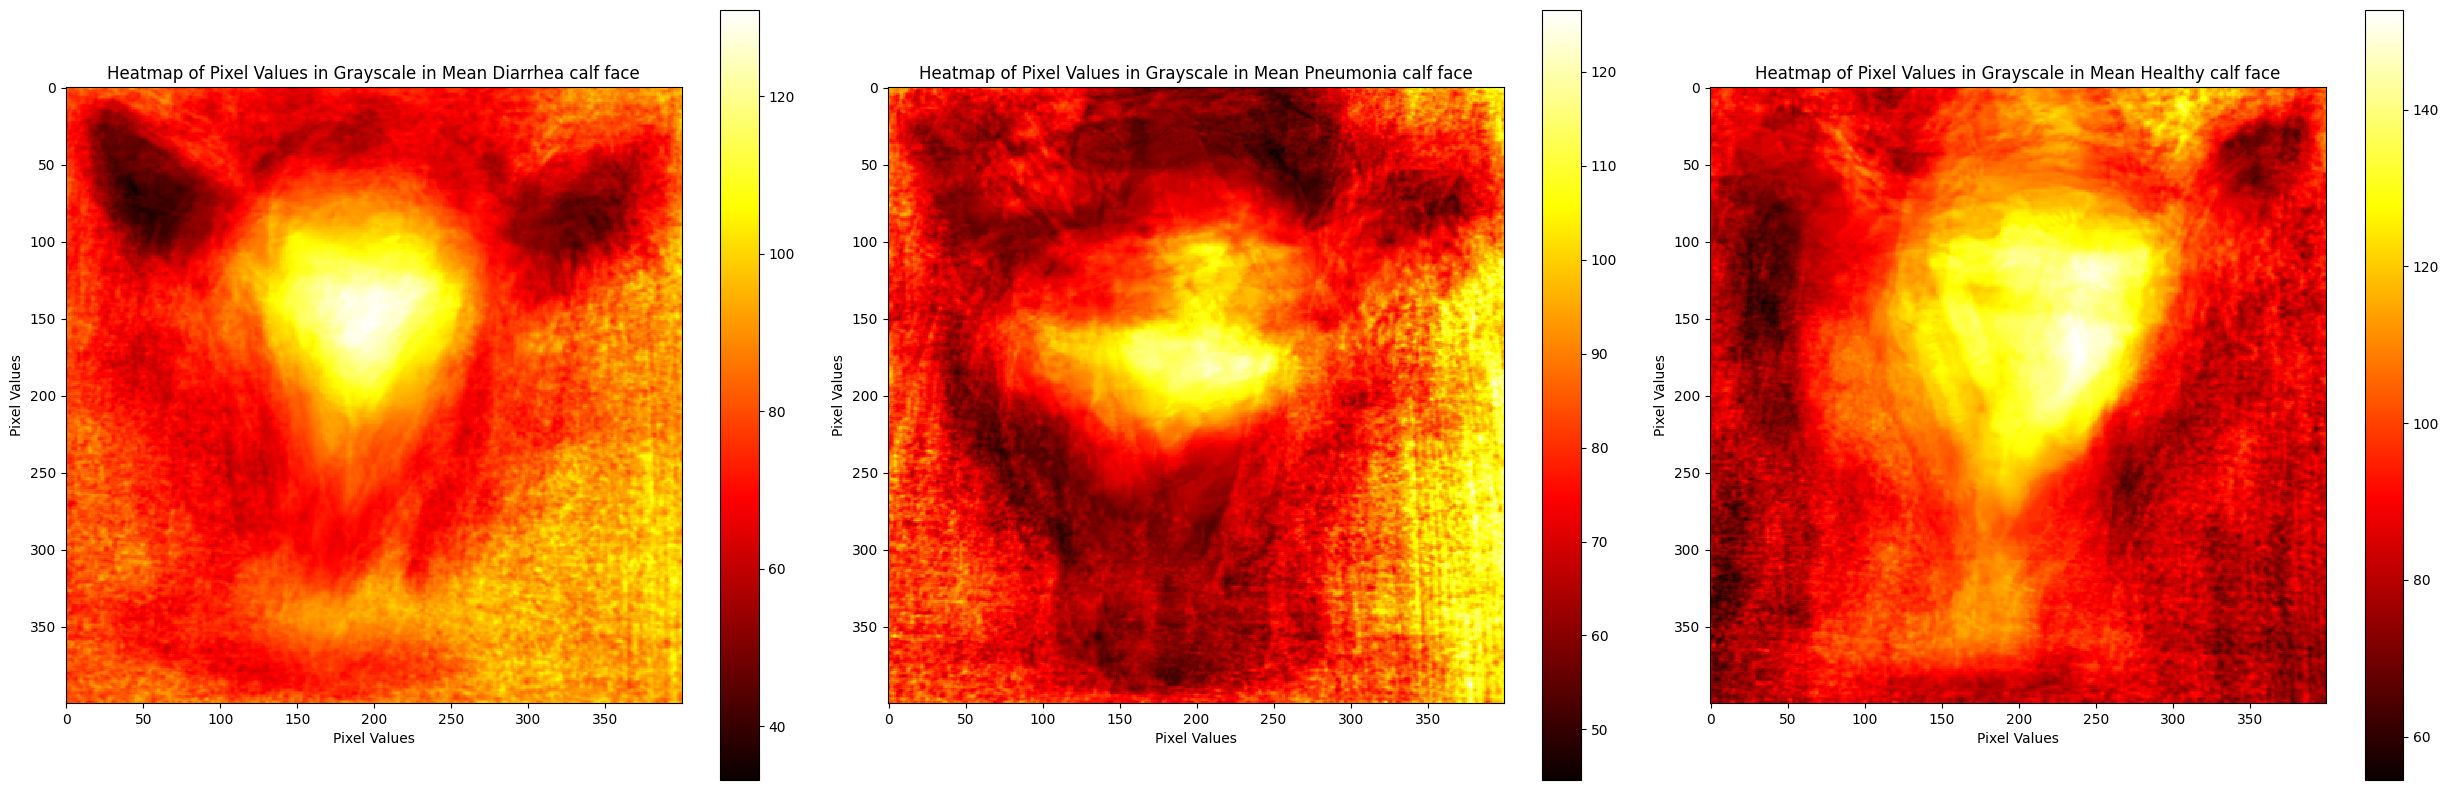

In [11]:
fig, axs = plt.subplots(1, len(labels), figsize=(25, 8))
transform = transforms.Grayscale()

for rowid in range(len(labels)):
    gray_tensor = transform(means[rowid, :])
    pixel_values = gray_tensor.squeeze().numpy()

    heatmap = axs[rowid].imshow(pixel_values * 255, cmap='hot', interpolation='nearest')
    axs[rowid].set_title(f'Heatmap of Pixel Values in Grayscale in Mean {labels[rowid]} calf face')
    axs[rowid].set_xlabel('Pixel Values')  # hide the axis ticks and labels
    axs[rowid].set_ylabel('Pixel Values')  # hide the axis ticks and labels
    # if rowid == len(labels) - 1:
        # plt.colorbar(heatmap) 
    plt.colorbar(heatmap) 

plt.tight_layout()
plt.show()